# LAB | A/B Testing in Python

### Challenge 1: 🚀 *Comparing Two Website Versions Using Hypothesis Testing*  

### **Objective**: 
Perform an A/B test to determine if a new webpage design (`Version B`) leads to a higher **click-through rate (CTR)** than the original (`Version A`).  

#### 📌 **Project Overview**  
We’ll:  
1. **Simulate** A/B test data (users & clicks).  
2. **Analyze** the results using statistical tests.  
3. **Conclude** whether `Version B` performs better.  



### **Problem Statement**  
You are a data analyst at an e-commerce company. The team wants to test if a new webpage design (`Version B`) increases click-through rates (CTR) compared to the original (`Version A`).  

### **Tasks**  
1. **Simulate Data**:  
   - Generate synthetic data for `Version A` (1000 visitors, 150 clicks) and `Version B` (1050 visitors, 180 clicks).  
2. **Statistical Test**:  
   - Perform a **Statistical Test** to compare CTRs.  
3. **Interpretation**:  
   - Determine if the difference is statistically significant (use α = 0.05).  
4. **Visualization**:  
   - Plot the CTRs for both versions using appropriate chart.  

**Deliverables**:  
- Code for simulation, testing, and visualization.  
- Written conclusion (1–2 sentences) on whether `Version B` performs better.  

#### 🛠 **Setup & Data Generation**  
First, let’s create synthetic data for the experiment.  


In [103]:
### Import Libraries
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, norm, ks_2samp
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportions_ztest

> Simulate User Data, We’ll assume:

- Version A: 1000 visitors, 150 clicks.

- Version B: 1050 visitors, 180 clicks.

In [104]:
# Simulate data
np.random.seed(42)
visitors_a = 1000
clicks_a = 150
visitors_b = 1050
clicks_b = 180

In [105]:
# Generate Version A data (1000 visitors, 150 clicks)
version_a = np.array([1] * 150 + [0] * (1000 - 150))  # 150 "1"s (clicks) + 850 "0"s (no clicks)
np.random.shuffle(version_a)  # Randomize the order
# Generate Version B data (1050 visitors, 180 clicks)
version_b = np.array([1] * 180 + [0] * (1050 - 180))  # 180 "1"s + 870 "0"s
np.random.shuffle(version_b)

In [106]:
#CTR=(Number of clicks)/(Number of visitors)
#1=User clicked, 0= User didn't click
#For a we create an array with 150 1s(clicks) and 850 0s(no clicks)
#For b we create an array with 180 1s(clicks) and 870 0s(no clicks)
#We shuffle both arrays randomly(to simulate real user behaviour)

In [107]:
# Combine into a DataFrame
df = pd.DataFrame({
    'Version': ['A'] * 1000 + ['B'] * 1050,
    'Clicked': np.concatenate([version_a, version_b])
})

In [108]:
#np.concatenate combines two arrays into a single array along a specified axis. (here axis=0)

In [109]:
df

,Version,Clicked
0,A,0
1,A,0
2,A,0
3,A,0
4,A,0
...,...,...
2045,B,0
2046,B,0
2047,B,1
2048,B,0


In [110]:
# Calculate standard deviation
std_a = np.std(version_a)
std_b = np.std(version_b)
print(std_a,std_b)

0.3570714214271425 0.37688302737922624


📊 Perform A/B Test
We’ll use a Chi-Square Test to compare proportions.

- Hypotheses

In [111]:
#You can use a Z-test to compare proportions (like CTR) if:
#Your sample size is large (typically ≥ 30 per group), and
#You know the standard deviation

In [112]:
# Null Hypothesis (H₀): CTR_a=CTR_b
# Alternative Hypothesis: CTR_a != CTR_b


- Run the Test

In [113]:
t_stat, p_value = ttest_ind(version_a, version_b)
t_stat, p_value

(np.float64(-1.3195206268862558), np.float64(0.18714260766783014))

In [114]:
#Z-test (recommended for binary data and proportions)

In [115]:
clicks = [150, 180]       
visitors = [1000, 1050]   
z_stat, p_value = proportions_ztest(clicks, visitors, alternative='two-sided')
z_stat, p_value

(np.float64(-1.3196039465145981), np.float64(0.1869672845487803))

> Interpret Results

In [116]:
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("There is enough evidence to reject the null hypothesis. There is a statistically significant difference between the CTR in Version A and Version B.")
else:
    print("There is not enough evidence to reject the null hypothesis. There is not a statistically significant difference between the CTR in Version A and Version B.")

P-value: 0.1869672845487803
There is not enough evidence to reject the null hypothesis. There is not a statistically significant difference between the CTR in Version A and Version B.


📈 Visualization

In [117]:
proportion_a=150/1000
proportion_b=180/1050
print(proportion_a,proportion_b)

0.15 0.17142857142857143


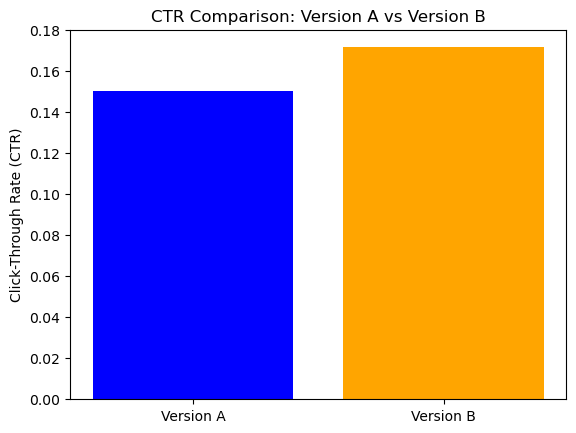

In [118]:
plt.bar(["Version A", "Version B"],[proportion_a, proportion_b], color=["blue", "orange"])
plt.ylabel("Click-Through Rate (CTR)")
plt.title("CTR Comparison: Version A vs Version B")
plt.show()

## Challenge 2: 🚀 A/B Testing Challenge with Real Data

#### **Objective**:  
1. Analyze **real A/B test data** (from Kaggle) to compare conversion rates.  
2. Use **bootstrapping** to estimate confidence intervals.  

---

#### 📌 **Project Overview**  
We’ll:  
1. **Load real A/B test data** (user sessions and conversions).  
2. **Compare conversion rates** using statistical tests.  
3. **Apply bootstrapping** to validate results.  



### **Problem Statement**  
Use the [Kaggle Marketing A/B Test dataset](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) to analyze if a new marketing campaign (`Group B`) improves conversion rates over the old campaign (`Group A`).  

### **Tasks**  
1. **Data Preparation**:  
   - Load the dataset and explore key metrics (sample sizes, conversion rates).  
2. **Hypothesis Testing**:  
   - Perform a **Statistical Test** to compare conversions between groups.  
3. **Bootstrapping**:  
   - Implement bootstrapping (`n=1000` resamples) to estimate 95% confidence intervals for conversion rates.  
4. **Visualization**:  
   -Compare conversion rates for both groups.  

**Deliverables**:  
- Code for analysis and bootstrapping.  
- Answers:  
  - P-value and statistical conclusion.  
  - Confidence intervals for both groups.  

#### 🛠 **Setup & Data Loading**  


In [119]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.stats import ttest_ind, norm, ks_2samp
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportions_ztest

> Load Open-Source Dataset
We’ll use the ["A/B Test Results"](https://www.kaggle.com/datasets/faviovaz/marketing-ab-testing) dataset from Kaggle.

In [120]:
# Load data (ensure CSV is in your working directory)
data = pd.read_csv("marketing_AB.csv")  # Download from Kaggle first!

In [121]:
data

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


📊 Part 1: Traditional A/B Test
> Calculate Conversion Rates

In [122]:
data.columns = data.columns.str.replace(' ', '_')


In [123]:
data

,Unnamed:_0,user_id,test_group,converted,total_ads,most_ads_day,most_ads_hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
...,...,...,...,...,...,...,...
588096,588096,1278437,ad,False,1,Tuesday,23
588097,588097,1327975,ad,False,1,Tuesday,23
588098,588098,1038442,ad,False,3,Tuesday,23
588099,588099,1496395,ad,False,1,Tuesday,23


In [124]:
data['test_group'].unique()

array(['ad', 'psa'], dtype=object)

In [125]:
#Total number of ads and total conversions for ads and psa
ad_number = data[data["test_group"]=="ad"]["total_ads"].sum()
psa_number = data[data["test_group"]=="psa"]["total_ads"].sum()
ad_converted_num = data[data["test_group"]=="ad"]["converted"].sum()
psa_converted_num = data[data["test_group"]=="psa"]["converted"].sum()
print(f"""
Ad:
- Total ads: {ad_number}
- Ad Conversions: {ad_converted_num}

PSA:
- Total ads: {psa_number}
- Psa Conversions: {psa_converted_num}
""")


Ad:
- Total ads: 14014701
- Ad Conversions: 14423

PSA:
- Total ads: 582481
- Psa Conversions: 420



> Statistical Test

In [126]:
#test group: If "ad" the person saw the advertisement, if "psa" they only saw the public service announcement
#converted: If a person bought the product then True, else is False


In [127]:
#Calculating conversion rates per User (The proportion of unique users who converted )
conversion_rate_per_user = data.groupby('test_group')['converted'].mean()
print((conversion_rate_per_user * 100).round(2).astype(str) + '%')

test_group
ad     2.55%
psa    1.79%
Name: converted, dtype: object


In [128]:
#Statistical test
#Null Hypothesis (H0): Conversion rate of ad = Conversion rate of psa
#Alternative Hypothesis (H1): Conversion rate of ad != Conversion rate of psa

In [129]:
# Run Z-test
converted_counts = [ad_converted_num, psa_converted_num]
total_num = [ad_number, psa_number]
z_stat, p_value = proportions_ztest(converted_counts, total_num, alternative='two-sided')
print(f"Z-statistic: {z_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

Z-statistic: 7.228637767350958
P-value: 4.878627648760414e-13
There is a significant difference between the two groups.


In [130]:
#The difference in conversion rates between the two groups is 7.23 standard deviations away from zero.
#The probability of observing a difference this extreme if the null hypothesis were true (i.e., if there were no real difference) is virtually zero.

In [131]:
#Note: The two-proportion Z-test compares the conversion rates (or any proportions) between two groups.

#### EXTRA 📈 Part 2: Bootstrapping Challenge
**Why Bootstrapping?**
 - Bootstrapping helps estimate confidence intervals for conversion rates by resampling data.

> Bootstrap Function

>Visualize Resultsm

In [132]:
def bootstrap_conversion_rates(data, n_resamples=1000):
    # First split the data by group
    ad_data = data[data['test_group'] == 'ad']['converted'].values
    psa_data = data[data['test_group'] == 'psa']['converted'].values
    
    # Store results for each group
    ad_means = []
    psa_means = []
    
    for _ in range(n_resamples):  # "_" means we ignore the loop counter
        # Resample each group separately
        ad_sample = np.random.choice(ad_data, len(ad_data), replace=True)
        psa_sample = np.random.choice(psa_data, len(psa_data), replace=True)
        
        # Calculate conversion rates (mean of 1s/0s)
        ad_means.append(ad_sample.mean())
        psa_means.append(psa_sample.mean())
    
    # Calculate 95% CIs
    ad_ci = (np.percentile(ad_means, 2.5), np.percentile(ad_means, 97.5))
    psa_ci = (np.percentile(psa_means, 2.5), np.percentile(psa_means, 97.5))
    
    return {'ad_ci': ad_ci, 'psa_ci': psa_ci}
results = bootstrap_conversion_rates(data)
print(f"Confidence intervals per user for the Ads group: {results['ad_ci'][0]*100:.2f}%, {results['ad_ci'][1]*100:.2f}%")
print(f"Confidence intervals per user for the PSA group: {results['psa_ci'][0]*100:.2f}%, {results['psa_ci'][1]*100:.2f}%")

Confidence intervals per user for the Ads group: 2.51%, 2.60%
Confidence intervals per user for the PSA group: 1.62%, 1.96%


## (Bonus) Challenge 3: 🎮 Advanced A/B Testing Challenge: Cookie Cats Retention Analysis 

#### **Objective**:  
1. Analyze player **retention rates** in the `cookie_cats` mobile game A/B test.  
2. Implement **sequential testing** (to avoid peeking at results prematurely).  
3. Conduct **power analysis** to determine optimal sample size.  

### **Problem Statement**  
Analyze the [Cookie Cats dataset](https://www.kaggle.com/datasets/yufengsui/mobile-games-ab-testing) to determine if moving the game’s first gate from level 30 (`gate_30`) to level 40 (`gate_40`) affects player retention.  

### **Tasks**  
1. **Retention Analysis**:  
   - Compare **1-day retention rates** between `gate_30` and `gate_40` using a Z-test.  
2. **Sequential Testing**:  
   - Simulate checking results at intervals (every 500 users) to avoid "peeking bias."  
3. **Power Analysis**:  
   - Calculate the required sample size to detect a 2% difference in retention (α = 0.05, power = 0.8).  
4. **Optional**:  
   - Repeat analysis for **7-day retention**.  

**Deliverables**:  
- Code for retention comparison, sequential testing, and power analysis.  
- Written summary:  
  - Does `gate_40` significantly impact retention?  
  - How does sequential testing affect decision-making?  



### 🛠 **Setup & Data Loading**  


In [133]:
# Import Libraries

In [134]:
# Load dataset 
data = pd.read_csv("./data/cookie_cats.csv")  # Columns: userid, version, sum_gamerounds, retention_1, retention_7

📊 Part 1: Retention Rate Analysis
> Compare 1-Day Retention

In [135]:
# TODO
# Insert your code HERE

> Statistical Test

In [136]:
# TODO
# Insert your code HERE

📈 Part 2: Sequential Testing
>  Why Sequential Testing?

- Avoids "peeking" at results prematurely by checking at intervals.

In [137]:
# TODO
# Insert your code HERE

⚡ Part 3: Power Analysis
>  Determine Required Sample Size

In [138]:
# TODO
# Insert your code HERE

Enjoy & Happy A/B Testing :) ......!